<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/perceptron_iris_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## パーセプトロンによるアヤメのデータ（２次元）の識別

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn import datasets
#from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

アヤメのデータの読み込み

In [2]:
# data = np.loadtxt("iris.dat",comments='#')
iris = datasets.load_iris()
X = iris.data[:100,:2]
y = iris.target[:100]
target_names = iris.target_names

print('Size of the data = ', X.shape)

n = X.shape[0]
mdim = X.shape[1]

print('N=', n, 'mdim=', mdim)

print('size of y', y.shape)

Size of the data =  (100, 2)
N= 100 mdim= 2
size of y (100,)


パーセプトロンの学習

In [3]:
# Learning rate
alpha=0.0001

clf_LR = Perceptron(alpha = alpha, max_iter=100, verbose=1)
clf_LR.fit(X, y)

coef_LR = clf_LR.coef_.ravel()
sparsity_LR = np.mean(coef_LR == 0) * 100

print("score with L1 penalty: %.4f" % clf_LR.score(X, y))
print("Sparsity with L1 penalty: %.2f%%" % sparsity_LR)

yy = np.zeros(len(X))
yy[clf_LR.predict(X) > 0.5] = 1

print('y\n', y)
print('Estimated Probabilities\n', yy)

-- Epoch 1
Norm: 19.51, NNZs: 2, Bias: -1.000000, T: 100, Avg. loss: 5.907600
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 26.76, NNZs: 2, Bias: -2.000000, T: 200, Avg. loss: 2.000500
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 27.01, NNZs: 2, Bias: -2.000000, T: 300, Avg. loss: 0.220400
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 30.02, NNZs: 2, Bias: -2.000000, T: 400, Avg. loss: 0.466900
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 36.42, NNZs: 2, Bias: -4.000000, T: 500, Avg. loss: 1.586500
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 38.69, NNZs: 2, Bias: -4.000000, T: 600, Avg. loss: 0.706700
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 44.31, NNZs: 2, Bias: -5.000000, T: 700, Avg. loss: 1.212100
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 45.12, NNZs: 2, Bias: -5.000000, T: 800, Avg. loss: 0.703800
Total training time: 0.01 seconds.
Convergence after 8 epochs took 0.01 seconds
score with L1 penalty: 0.9900
Sparsity with L1 pena

識別境界の表示

/home/kurita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


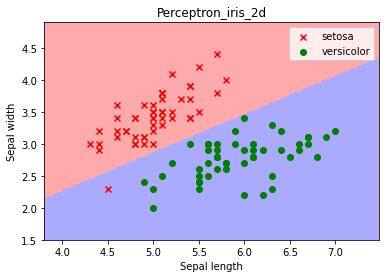

In [4]:
%matplotlib inline

# step size in mesh for plot
h = .02 

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## colors
colors = ['red', 'green', 'blue']
markers = ['x', 'o', 'v']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

(xsize, ysize) = xx.shape
nelm = xsize * ysize

XX = np.c_[xx.reshape((nelm,1)), yy.reshape((nelm,1))]
#print(XX)

Z = np.zeros(len(XX))
Z[clf_LR.predict(XX) > 0.5] = 1
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
plt.legend()
plt.title('Perceptron_iris_2d')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('perceptron_iris_2d.eps')

plt.show()